In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import optimizers

5


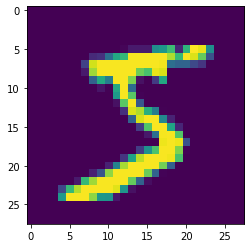

In [4]:
# import mnist data and visualize first image
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[0])
print(y_train[0])

In [5]:
# scale data and reshape
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

# First parameter: The image being classified.
# Fourth parameter: The color.
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)



In [6]:
# make output a 10 dim vector indicating class
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
# create convolution neural network
model = Sequential()

# Kernels here are the filters. They need to scale with the image sizes.
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))

# Downsampling to 14 x 14 images.
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropouts prevents overfitting.
model.add(Dropout(0.25))

# Another layer.
model.add(Conv2D(64, (3, 3), activation='relu'))

# Now 7 x 7 images.
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

# Dense means making a feed-forward NN from a 500 node graph.
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
# compile model
sgd=optimizers.SGD(lr=.01) 
model.compile(loss='categorical_crossentropy', 
              optimizer=sgd,
              metrics=['accuracy'])

In [9]:
model.fit(X_train, Y_train,
          batch_size=500, nb_epoch=10,verbose=1,
          validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 333us/step - loss: 2.2713 - acc: 0.1465 - val_loss: 2.1975 - val_acc: 0.5482
Epoch 2/10
60000/60000 [==============================] - 19s 322us/step - loss: 2.0774 - acc: 0.3140 - val_loss: 1.7456 - val_acc: 0.7012
Epoch 3/10
60000/60000 [==============================] - 19s 320us/step - loss: 1.5416 - acc: 0.5036 - val_loss: 0.9557 - val_acc: 0.7991
Epoch 4/10
60000/60000 [==============================] - 19s 317us/step - loss: 1.1046 - acc: 0.6378 - val_loss: 0.6401 - val_acc: 0.8518
Epoch 5/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.8920 - acc: 0.7075 - val_loss: 0.5038 - val_acc: 0.8778
Epoch 6/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.7612 - acc: 0.7516 - val_loss: 0.4231 - val_acc: 0.8952
Epoch 7/10
60000/60000 [==============================] - 19s 313us/step - loss: 0.6765 - acc: 0.7840 - val_loss: 0.